# DATA SCİENCE FOR BEGİNNERS
This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.
This data set has 699 rows and 11 columns (features). Columns names are:
id
clump_thickness
size_uniformity
shape_uniformity
marginal_adhesion
epithelial_size
bare_nucleoli
bland_chromatin
normal_nucleoli
mitoses
class



In [384]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['breastCancer.csv']


In [385]:
# İmport the data 
df=pd.read_csv('../input/breastCancer.csv')

In [386]:
# we can learn general information about the data.
df.info()
# It shows that all features are integer while bare_nucleoli is object (string)
# There are not null number and it has 699 rows and 11 columns. We can also see columns names.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                   699 non-null int64
clump_thickness      699 non-null int64
size_uniformity      699 non-null int64
shape_uniformity     699 non-null int64
marginal_adhesion    699 non-null int64
epithelial_size      699 non-null int64
bare_nucleoli        699 non-null object
bland_chromatin      699 non-null int64
normal_nucleoli      699 non-null int64
mitoses              699 non-null int64
class                699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [387]:
# Let's look at data quickly 
df.head(7) 

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2


In [388]:
# Correlation 
df.corr()
# This shows the correlation between the features. This is very important for data scientist
# Because we dont want to use features which are highly correalted with each other. We need
# to determine the correlated features and delete some of them by using techniques.

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
id,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
clump_thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
size_uniformity,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
shape_uniformity,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
epithelial_size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
bland_chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


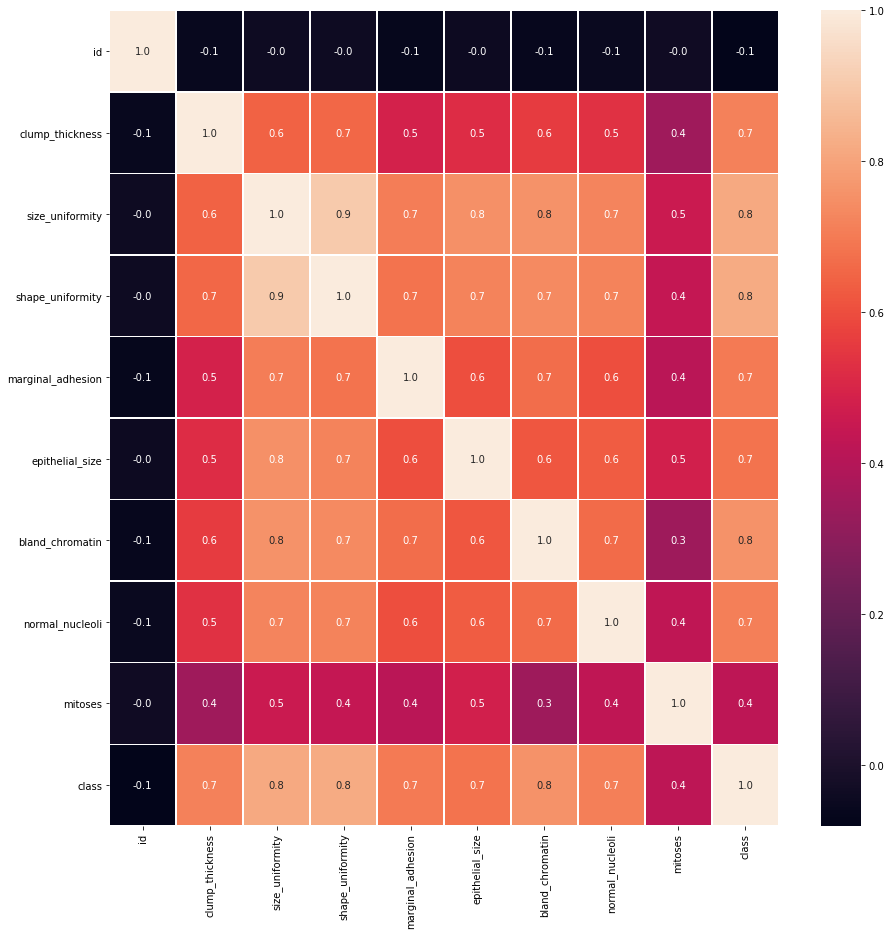

In [389]:
# Correlation visualisation
# Heatmap is good method to visualize correlation between features.
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt='.1f', ax=ax)

Text(0.5, 1.0, 'size_uniformity --- shape_uniformity scatter plot')

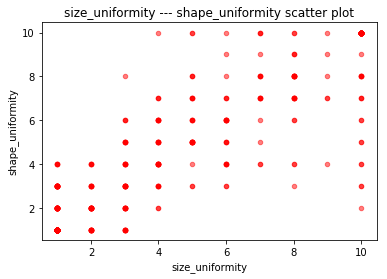

In [390]:
#Scatter plot is a useful method to see the correlation between 2 features
df.plot(kind='scatter', x='size_uniformity', y='shape_uniformity', alpha=.5, color='red' )
plt.xlabel('size_uniformity')
plt.ylabel('shape_uniformity')
plt.title('size_uniformity --- shape_uniformity scatter plot')

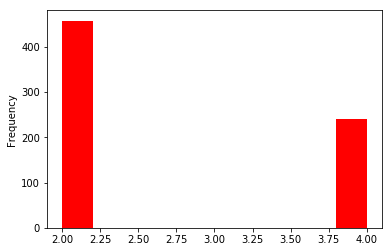

In [391]:
#Histogram is as good method to see the distribution of a data.It also get called as frequency
df['class'].plot(kind='hist',color='red')

In [392]:
#valu_counts gives the numbers of the unique data in the selected feature
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [393]:
# Describe method allow us to have statistic values of the data
df.describe()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


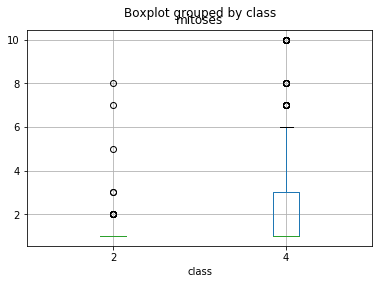

In [394]:
# Quartile shows the improper data in the selected feature.we need to make sure that they are true
df.boxplot('mitoses', 'class')

In [395]:
# concatenating gives chance to make new dataframe by using selected features
data1 = df['size_uniformity']
data2 = df['shape_uniformity']
data3 = df['class']
df1 = pd.concat([data1, data2, data3],axis=1, ignore_index=False)
df1.head()

,size_uniformity,shape_uniformity,class
0,1,1,2
1,4,4,2
2,1,1,2
3,8,8,2
4,1,1,2


In [396]:
# missing data must be detected and handled properly such as deleting and changing with othher
# proper data. one of useful method is to use dropna() and fillna().
df['bare_nucleoli'].value_counts(dropna=True) # this gives all data with NaN data.
# we have 16 ? data which are not number

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

In [397]:
# Changing the any values in the feature
# I want to change '?' data in bare_nucleoli feature because '?' is not a number
# I will write 29 instead of '?' numbers in bare_nucleoli feature. 
df['bare_nucleoli'].values[df['bare_nucleoli'] == '?'] = 29
df['bare_nucleoli'].value_counts(dropna=True)


1     402
10    132
2      30
5      30
3      28
8      21
4      19
29     16
9       9
7       8
6       4
Name: bare_nucleoli, dtype: int64

In [398]:
# Dropping the missing values with dropna()
data_drop = df.size_uniformity.dropna(inplace=False) 


In [399]:
# Filling the missing values with anything by using fillna(). Here we will with 'empty'
data_drop1 = df['shape_uniformity'].fillna('empty', inplace=False) 


In [400]:
# Finding values in the certain location (index) by using loc method
df.loc[1,['size_uniformity']] # it gives the first row of the size_uniformity feature

size_uniformity    4
Name: 1, dtype: object

In [401]:
# Finding values in the certain location (index) by using loc method
#This selects the first 5 rows of the features between size_uniformity and mitoses.
df.loc[1:5, 'size_uniformity':'mitoses']

,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
1,4,4,5,7,10,3,2,1
2,1,1,1,2,2,3,1,1
3,8,8,1,3,4,3,7,1
4,1,1,3,2,1,3,1,1
5,10,10,8,7,10,9,7,1


In [402]:
df['shape_uniformity'].value_counts(dropna=True)

1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: shape_uniformity, dtype: int64

In [403]:
# Filtering the data
# choosing data if shape_uniformity is equal to 1 and size_uniformity is equal to 2
data3 = df[(df['shape_uniformity'] == 1) & (df['size_uniformity'] == 2)]
data3

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
9,1033078,4,2,1,1,2,1,2,1,1,2
26,1066373,3,2,1,1,1,1,2,1,1,2
37,1081791,6,2,1,1,1,1,7,1,1,2
82,1143978,5,2,1,1,2,1,3,1,1,2
119,1173681,3,2,1,1,2,2,3,1,1,2
121,1174057,4,2,1,1,2,2,3,1,1,2
298,625201,8,2,1,1,5,1,1,1,1,2
398,1196475,3,2,1,1,2,1,2,2,1,2
404,1223543,1,2,1,3,2,1,1,2,1,2
478,1296593,5,2,1,1,2,1,1,1,1,2


In [404]:
# Defining the new feature.
# We can defining the new features by using the old features
df['new'] = df.size_uniformity + df.shape_uniformity
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class,new
0,1000025,5,1,1,1,2,1,3,1,1,2,2
1,1002945,5,4,4,5,7,10,3,2,1,2,8
2,1015425,3,1,1,1,2,2,3,1,1,2,2
3,1016277,6,8,8,1,3,4,3,7,1,2,16
4,1017023,4,1,1,3,2,1,3,1,1,2,2


In [405]:
# Let's see the new feature
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class,new
0,1000025,5,1,1,1,2,1,3,1,1,2,2
1,1002945,5,4,4,5,7,10,3,2,1,2,8
2,1015425,3,1,1,1,2,2,3,1,1,2,2
3,1016277,6,8,8,1,3,4,3,7,1,2,16
4,1017023,4,1,1,3,2,1,3,1,1,2,2


In [406]:
#Stacking the features
a=df['size_uniformity']
b=df['shape_uniformity']
np.vstack((a,b)) # it stacking two columns side by side
np.hstack((a,b)) # it stacking two columns one under the other


array([ 1,  4,  1, ..., 10,  6,  8])

In [407]:
# Split the data into 2 groups as features and class
X_data = df.drop(["id","new","class"],axis=1,inplace=False)# features columns
Y_data = df["class"].values # class column 
Y_data

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4,
       4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4,
       2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4,
       4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4,